ANALYSIS REPORT:
The output for the queen and rook is the same, the movement of queen and rook is similar so the vertexes come out as similar for both of them. This is why the graph are also the same as the edges didnt change, connections remained the same and the number of neighbours for each node remained same. for every vertex ther are different number of neighboours

for knn the neighbours depend on the k value so every vertex has the same number of neighbours, that is why the graph is constant at all points as same number of neighbours for every vertex



In [23]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import contextily
import geopandas
import rioxarray
import seaborn
import pandas
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry

In [24]:
from pysal.lib import weights

In [27]:
# Set the index col to Area Codes
ref = pandas.read_csv("/home/abdullah/Desktop/sps/Course-Datasets-RBW/Course-Datasets/brexit_vote.csv", index_col="Area_Code")
ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, E06000031 to E08000036
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       382 non-null    int64  
 1   Region_Code              382 non-null    object 
 2   Region                   382 non-null    object 
 3   Area                     382 non-null    object 
 4   Electorate               382 non-null    int64  
 5   ExpectedBallots          382 non-null    int64  
 6   VerifiedBallotPapers     382 non-null    int64  
 7   Pct_Turnout              382 non-null    float64
 8   Votes_Cast               382 non-null    int64  
 9   Valid_Votes              382 non-null    int64  
 10  Remain                   382 non-null    int64  
 11  Leave                    382 non-null    int64  
 12  Rejected_Ballots         382 non-null    int64  
 13  No_official_mark         382 non-null    int64  
 14  Voting_for_both_a

In [28]:
lads = geopandas.read_file(
    "/home/abdullah/Desktop/sps/Course-Datasets-RBW/Course-Datasets/local_authority_districts.geojson"
).set_index("lad16cd")
lads.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000023
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    391 non-null    int64   
 1   lad16nm     391 non-null    object  
 2   lad16nmw    22 non-null     object  
 3   bng_e       391 non-null    int64   
 4   bng_n       391 non-null    int64   
 5   long        391 non-null    float64 
 6   lat         391 non-null    float64 
 7   st_areasha  391 non-null    float64 
 8   st_lengths  391 non-null    float64 
 9   geometry    391 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 41.7+ KB


In [29]:
db = (
    geopandas.GeoDataFrame(
        lads.join(ref[["Pct_Leave"]]), crs=lads.crs
    )
    .to_crs("EPSG:3857")[
        ["objectid", "lad16nm", "Pct_Leave", "geometry"]
    ]
    .dropna()
)
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 380 entries, E06000001 to W06000023
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   objectid   380 non-null    int64   
 1   lad16nm    380 non-null    object  
 2   Pct_Leave  380 non-null    float64 
 3   geometry   380 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 22.9+ KB


In [59]:
w_queen = weights.contiguity.Queen.from_dataframe(db)
w_rook= weights.contiguity.Rook.from_dataframe(db)
w_knn=weights.distance.KNN.from_dataframe(db, k=4)

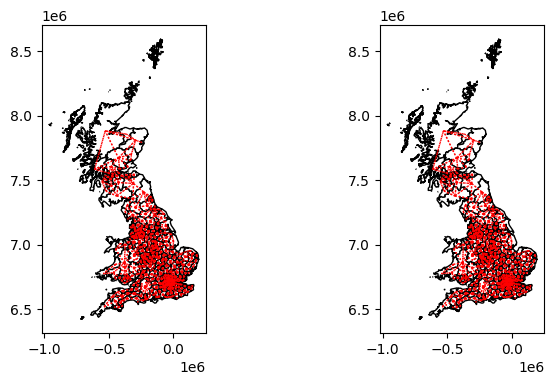

In [66]:
# Plot tract geography
db=db.reset_index(drop=True)
f, axs = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    ax = db.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w_queen.plot(
        db,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
  

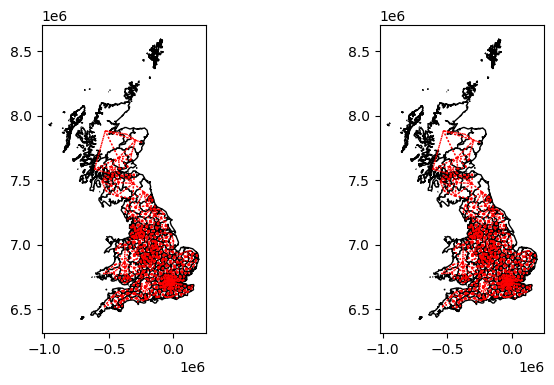

In [67]:
# Plot tract geography
db=db.reset_index(drop=True)
f, axs = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    ax = db.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w_rook.plot(
        db,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
  

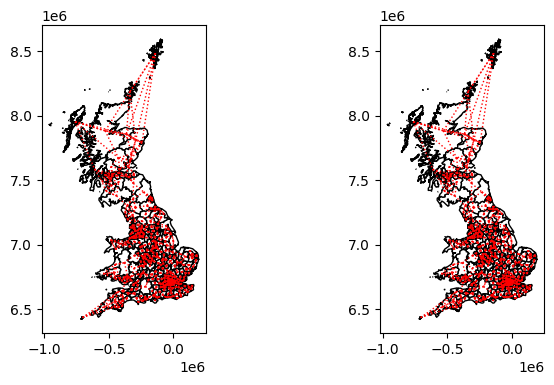

In [69]:
# Plot tract geography
db=db.reset_index(drop=True)
f, axs = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    ax = db.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w_knn.plot(
        db,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
  

In [68]:
# Plot tract geography
db=db.reset_index()
f, axs = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    ax = db.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )
    # Plot graph connections
    w_queen.plot(
        db,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )
    # Remove the axis
#     axs[i].set_axis_off()
# axs[1].axis([-13040000, -13020000, 3850000, 3860000]);

ValueError: cannot insert level_0, already exists

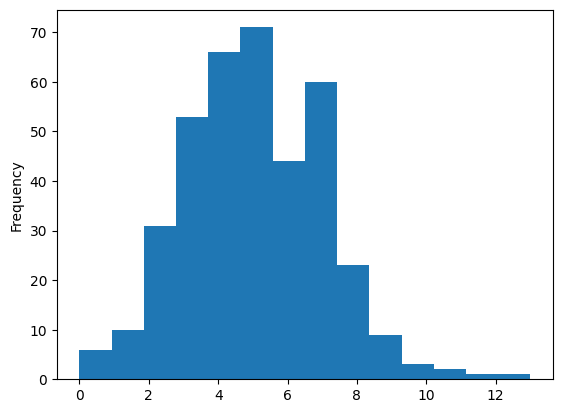

In [35]:
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

1.299168975069252


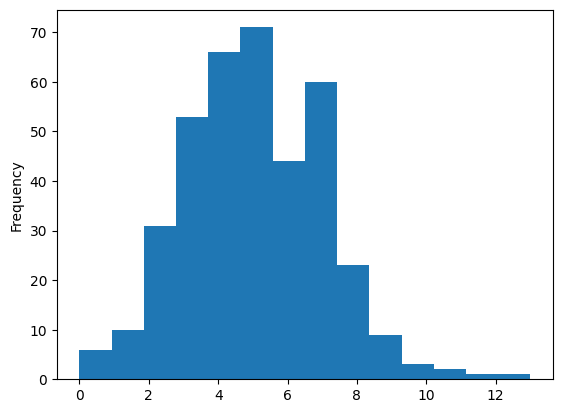

In [37]:
w_rook = weights.contiguity.Rook.from_dataframe(db)
print(w_rook.pct_nonzero)
s = pandas.Series(w_rook.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

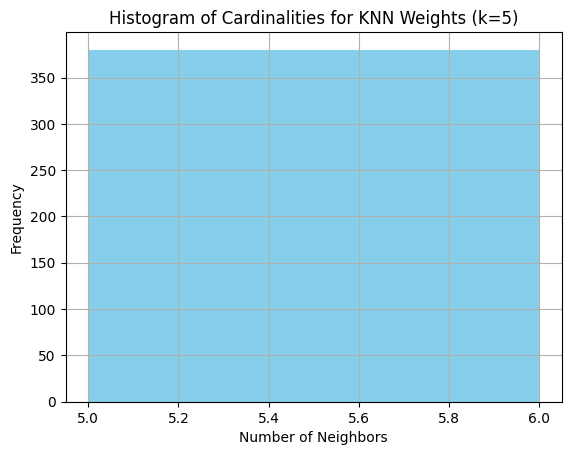

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from libpysal.weights import KNN

# Assuming you already have your dataframe loaded as 'db'
# Define the number of nearest neighbors 'k'
k = 5  # You can change this value as needed

# Create KNN weights
w_knn = KNN.from_dataframe(db, k=k)

# Plot histogram for cardinalities
s = pd.Series(w_knn.cardinalities)
bin_edges = range(s.min(), s.max() + 2)  # Create bin edges from minimum to maximum cardinality + 1
s.plot.hist(bins=bin_edges, color='skyblue')  # Adjust the color if needed
plt.title('Histogram of Cardinalities for KNN Weights (k={})'.format(k))
plt.xlabel('Number of Neighbors')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()


In [39]:
mx = ref

In [10]:
mx_knn4 = weights.KNN.from_dataframe(mx, k=4)

In [11]:
mx_bw = weights.util.block_weights(mx["INEGI2"].values)

In [12]:
mx_union = weights.set_operations.w_union(mx_bw, mx_queen)

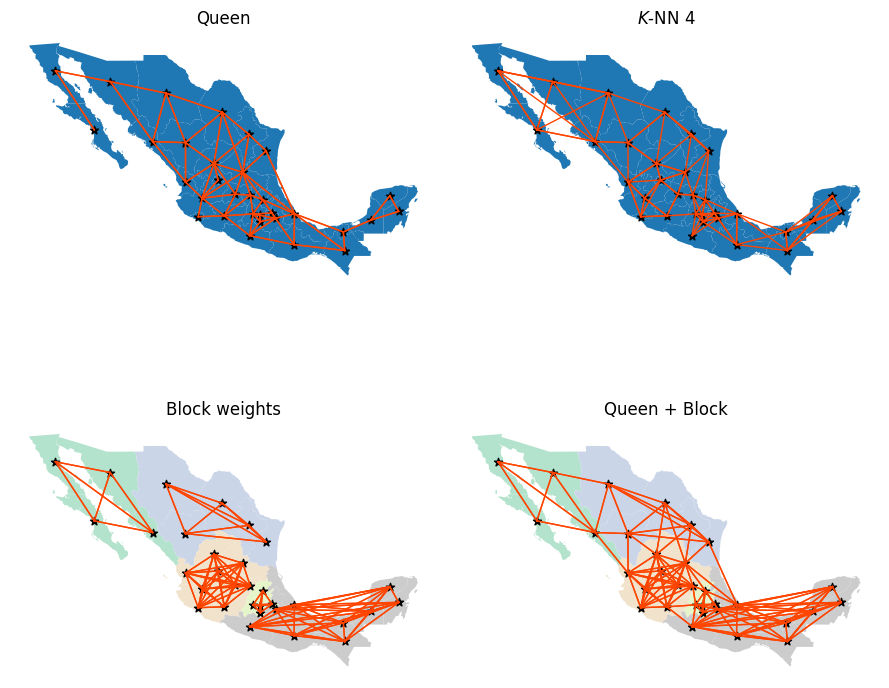

In [13]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Contiguity
ax = axs[0, 0]
mx.plot(ax=ax)
mx_queen.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen")

# KNN
ax = axs[0, 1]
mx.plot(ax=ax)
mx_knn4.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("$K$-NN 4")

# Block
ax = axs[1, 0]
mx.plot(column="INEGI2", categorical=True, cmap="Pastel2", ax=ax)
mx_bw.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Block weights")

# Union
ax = axs[1, 1]
mx.plot(column="INEGI2", categorical=True, cmap="Pastel2", ax=ax)
mx_union.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen + Block")
f.tight_layout()
plt.show()